## Simple Linear Regression


In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [244]:
df = pd.read_csv("/Users/satwikbiswas/Documents/Python/Data/weight-height.csv")

In [245]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [246]:
df.drop("Gender",axis=1,inplace=True)

In [247]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [249]:
df[df.duplicated()]

,Height,Weight


In [250]:
df.tail()

,Height,Weight
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461
9999,61.944246,113.649103


In [251]:
df_reduced = df.sample(n=100, random_state=42)  # Set random_state for reproducibility


In [252]:
df = df_reduced
df = df.reset_index(drop=True)

In [253]:
df.tail()

,Height,Weight
95,67.031777,188.155622
96,65.140536,139.827624
97,66.287442,168.905572
98,63.769356,145.403687
99,64.497291,126.584642


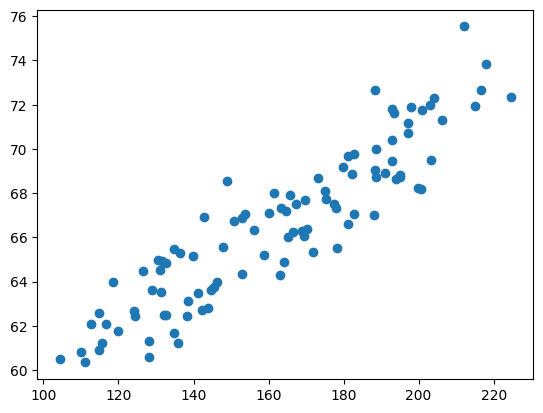

In [254]:
## in the table weight is my indipendent variable and height is my dependent variable
plt.scatter(df["Weight"],df["Height"])

<Axes: >

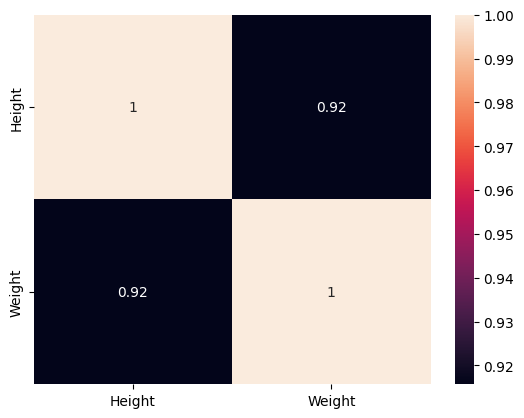

In [255]:
sb.heatmap(df.corr(),annot=True)

In [256]:
## as height and weight have high positive corrilation thus linerar regression will work

In [257]:
## we seprate the dependent the indipendent features

X = df[["Weight"]] ## the indipendent variable must be in form of a df or a 2d matrix not in series
y = df["Height"]  ## Dependent features can be array or series

In [258]:
X.head()

,Weight
0,173.115813
1,195.162042
2,170.217451
3,215.049660
4,182.721452


In [259]:
y.shape

(100,)

In [260]:
## Train Test Split
from sklearn.model_selection import train_test_split
"""
train_test_split have the following params
X,y : independent and dependent var
shuffle : this will shuffle the dataset before selecting
stratify : Ensures the train and test splits maintain the same proportion of class labels as the original dataset.
"""

'\ntrain_test_split have the following params\nX,y : independent and dependent var\nshuffle : this will shuffle the dataset before selecting\nstratify : Ensures the train and test splits maintain the same proportion of class labels as the original dataset.\n'

In [261]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle=True,random_state=10)

In [262]:
## standarisation of data
## in this step we basically calculate the z score of the data set 
## this process is done to bring all the dtaa in same scale and the model will not get baised toward one data having large scale
## decrease the convergence time

In [263]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)  ## this computes the mean and varience and calculate the Z score

X_test = scaler.transform(X_test)  ## this computes the z score based on the variemce and mean of the train data 

## we use the mean and varience of train data to avoid data leakage we donot want the model to any how know abou the pattern of the test data

## also this make the data remain consistent 


In [264]:
## apply linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [265]:
print("The slope of the fit line is ",regression.coef_)
print("The intercept of the fit line is ",regression.intercept_)

The slope of the fit line is  [3.02193521]
The intercept of the fit line is  66.06896132046846


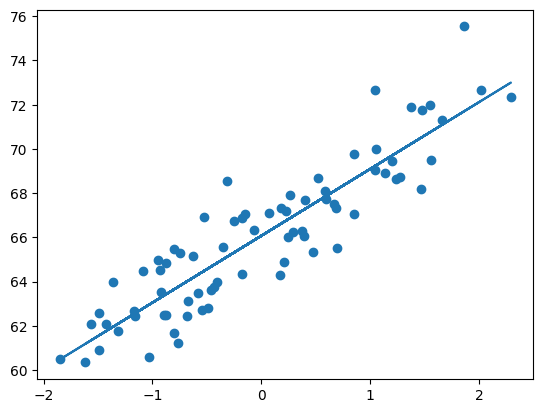

In [266]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [267]:
y_pred = regression.predict(X_test)

In [268]:
## calculating the R2 value of the model 
from sklearn.metrics import r2_score
score = r2_score(y_true=y_test,y_pred=y_pred)
print(score)
## we can also calculated the adjusted R2 value


0.8649524080561828


In [269]:
## Prediction

## let us find the hight when the weight is 130

regression.predict(scaler.transform([[130]]))

/Users/satwikbiswas/Documents/Python/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.14614804])